# Handwritten digits classification using a Neural Network
<br>
<img src="https://miro.medium.com/max/800/1*LyRlX__08q40UJohhJG9Ow.png" align="left" width="50%">

## Libraries and settings

In [1]:
# Required libraries:
#!pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('Current working directory:', os.getcwd())

     -------------------------------------- 266.3/266.3 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.8 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 42.3 MB/s eta 0:00:00
     ---------------------------------------- 124.6/124.6 kB ? eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 42.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 79.4 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 18.8 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 26.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 35.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 38.4 MB/s eta 0:00:00
     -------------------------------------- 177.0/177.0 k

C:\Users\jansi\anaconda3\envs\daenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Current working directory: C:\Users\jansi\OneDrive\Studium\HS22\DA\KK\KK12


## Prepare the data (MNIST dataset)
For details of the data see: https://en.wikipedia.org/wiki/MNIST_database

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


## Show single handwritten digit

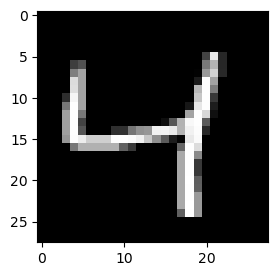

In [3]:
image = X_train[2] # Change index to show other digits
fig = plt.figure
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
# Shape of a single image
X_train[2].shape

(28, 28, 1)

## Initialize the model

In [5]:
# Initialize the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model.summary()

## Train the model

In [6]:
# Define the batch size and number of epochs
# Note:
# The batch size is a number of samples processed 
# before the model is updated. The number of epochs 
# is the number of complete passes through the training 
# dataset. The size of a batch must be more than or equal 
# to one and less than or equal to the number of samples 
# in the training dataset.

batch_size = 128
epochs = 5

# Train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 50s 113ms/step - loss: 0.3610 - accuracy: 0.8904 - val_loss: 0.0789 - val_accuracy: 0.9788
Epoch 2/5
422/422 [==============================] - 39s 92ms/step - loss: 0.1103 - accuracy: 0.9662 - val_loss: 0.0534 - val_accuracy: 0.9860
Epoch 3/5
422/422 [==============================] - 36s 85ms/step - loss: 0.0855 - accuracy: 0.9743 - val_loss: 0.0499 - val_accuracy: 0.9853
Epoch 4/5
422/422 [==============================] - 33s 77ms/step - loss: 0.0727 - accuracy: 0.9774 - val_loss: 0.0422 - val_accuracy: 0.9877
Epoch 5/5
422/422 [==============================] - 37s 87ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.0400 - val_accuracy: 0.9895


## Evaluate the trained model

In [7]:
# Calculate accuracy based on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')

Test accuracy: 0.9887


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2022-12-12 17:34:49
Python Version: 3.9.13
-----------------------------------
